In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score , GridSearchCV , train_test_split

In [2]:
df = pd.read_csv("../datasets/advanced_house_train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
pd.set_option("display.max_columns" , None)

In [5]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

# EDA

### STEPS FOR EDA:
1. HANDLE MISSING VALUES
2. FIND ALL THE NUMERICAL VALUES
3. DISTRIBUTION OF ALL NUMERICAL VALUES
4. FIND ALL CATEGORICAL VALUES
5. CARDINALITY OF ALL CATEGORICAL VALUES
6. OUTLIERS
7. RELATIONSHIP BETWEEN INDEPENDENT AND DEPENDENT VALUES

## STEP-1

In [6]:
na_columns = [cols for cols in df.columns if (df[cols].isna()).mean() > 0]
for cols in na_columns:
    print(f"{cols} nan value % is {(df[cols].isna().mean())*100}")
print(f"{len(na_columns)}")

LotFrontage nan value % is 17.73972602739726
Alley nan value % is 93.76712328767123
MasVnrType nan value % is 0.547945205479452
MasVnrArea nan value % is 0.547945205479452
BsmtQual nan value % is 2.5342465753424657
BsmtCond nan value % is 2.5342465753424657
BsmtExposure nan value % is 2.6027397260273974
BsmtFinType1 nan value % is 2.5342465753424657
BsmtFinType2 nan value % is 2.6027397260273974
Electrical nan value % is 0.0684931506849315
FireplaceQu nan value % is 47.26027397260274
GarageType nan value % is 5.5479452054794525
GarageYrBlt nan value % is 5.5479452054794525
GarageFinish nan value % is 5.5479452054794525
GarageQual nan value % is 5.5479452054794525
GarageCond nan value % is 5.5479452054794525
PoolQC nan value % is 99.52054794520548
Fence nan value % is 80.75342465753424
MiscFeature nan value % is 96.30136986301369
19


#### MISSING VALUES COUNT
The above analysis tells that 19 features have some amount of missing values

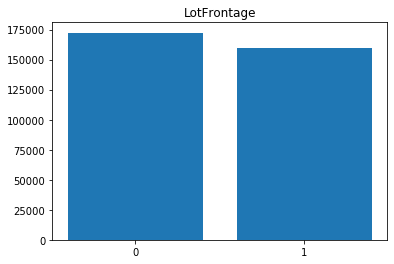

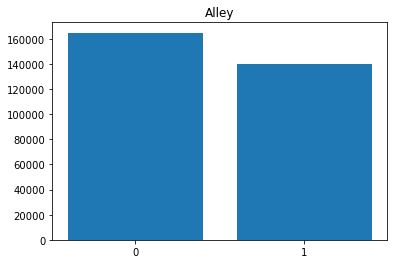

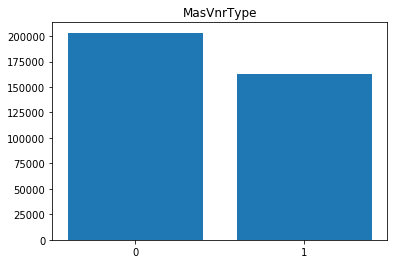

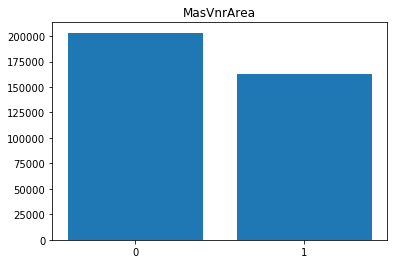

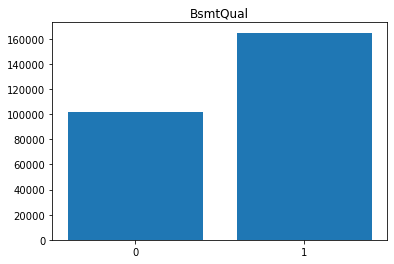

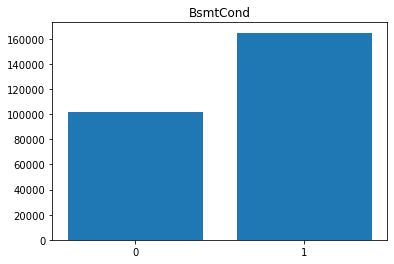

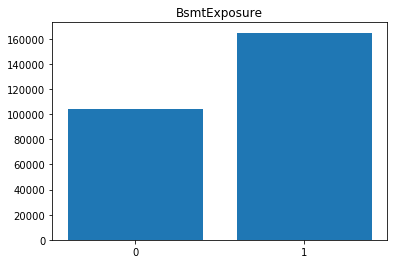

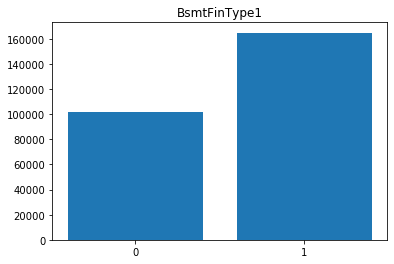

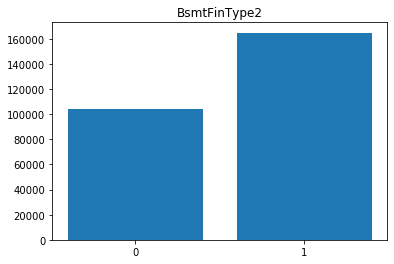

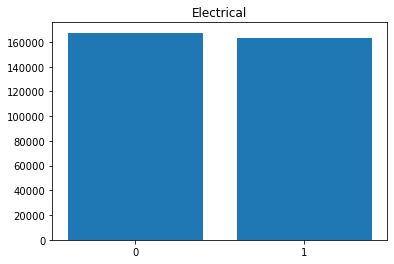

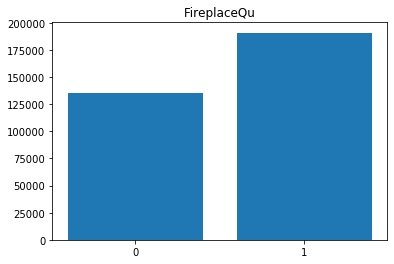

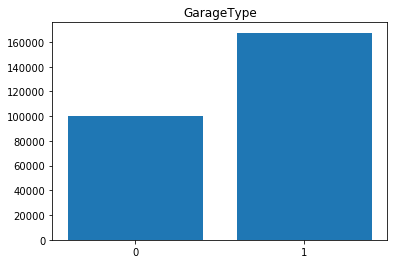

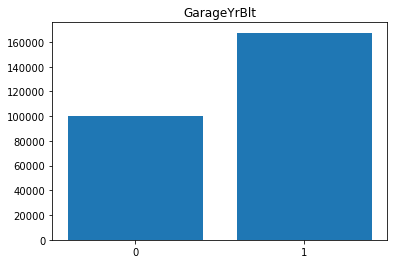

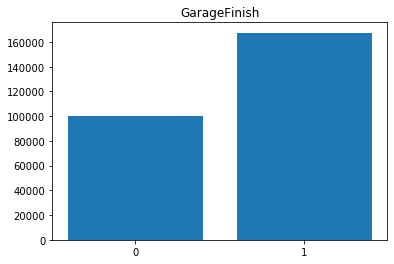

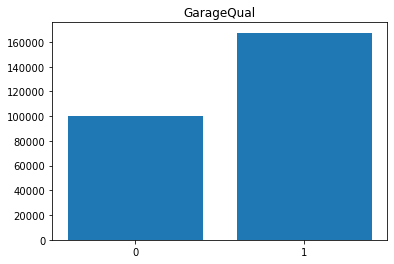

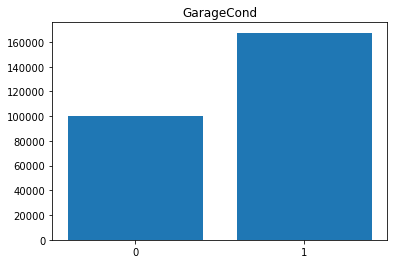

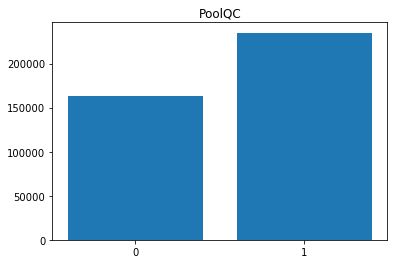

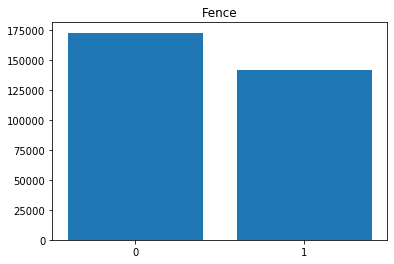

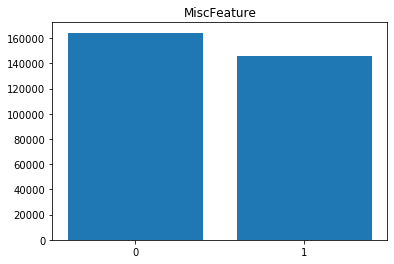

In [7]:
for cols in na_columns: 
    df_copy = df.copy()
    null = df_copy[df_copy[cols].isnull() == True]["SalePrice"].median()    
    not_null = df_copy[df_copy[cols].isnull() == False]["SalePrice"].median()    
    plt.bar(["0","1"] , [null , not_null])
    plt.title(cols)
    plt.show()

### THE OUTPUT DEPEND'S A LOT ON MISSING VALUES
this is clearly visible as the values of missing variables would go very down or very high , indicating a strong relation

## STEP-2 & 3

### DISCRETE VARIABLE ANALYSIS

In [8]:
numerical_cols = [cols for cols in df.columns if df[cols].dtype != "O"]
# O is being used as String
df[numerical_cols].head(6)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000


In [9]:
year_cols = [cols for cols in df.columns if cols.find("Yr") != -1 or cols.find("Year") != -1]

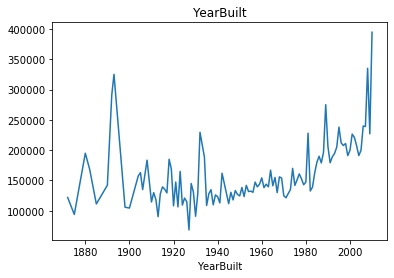

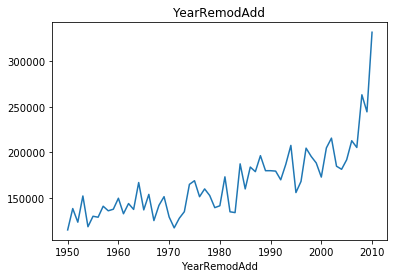

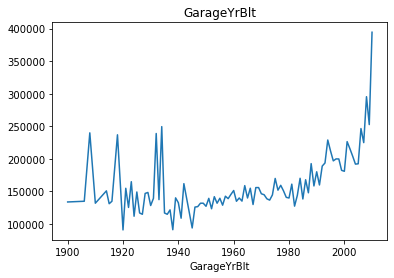

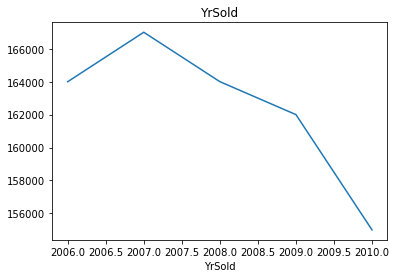

In [10]:
for cols in year_cols:
    df.groupby(cols)["SalePrice"].median().plot()
    plt.title(cols)
    plt.show()

The above info is wrong so apply the below method

In [11]:
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

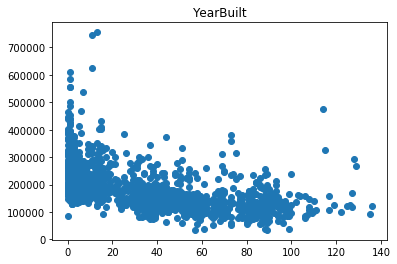

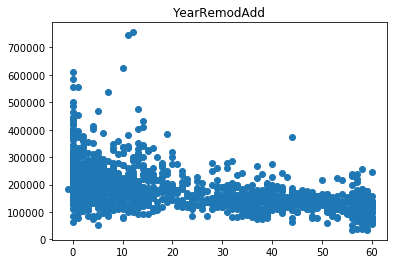

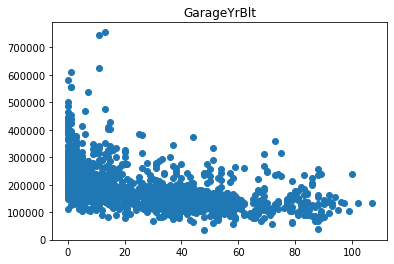

In [12]:
for cols in year_cols:
    df_copy = df.copy()
    if cols != "YrSold":
        df_copy[cols] = df_copy["YrSold"] - df_copy[cols]
        plt.scatter(df_copy[cols] , df_copy["SalePrice"])
        plt.title(cols)
        plt.show()

In [13]:
discrete_cols = [cols for cols in df[numerical_cols].columns if len(df[cols].unique()) < 25 and cols not in year_cols]

In [14]:
# total discrete columns 
len(discrete_cols)

17

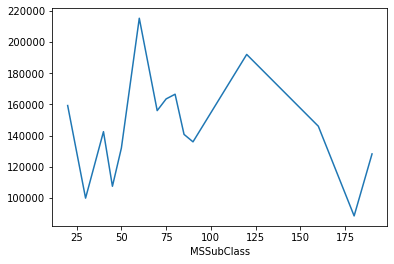

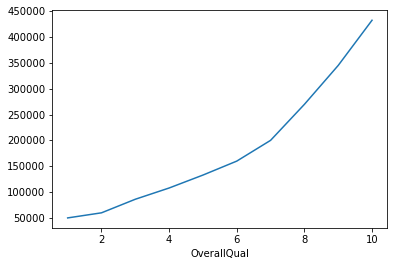

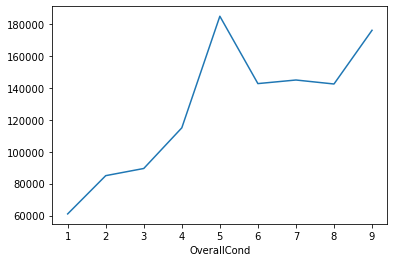

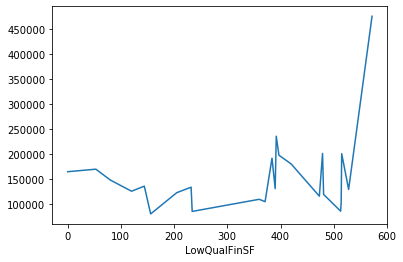

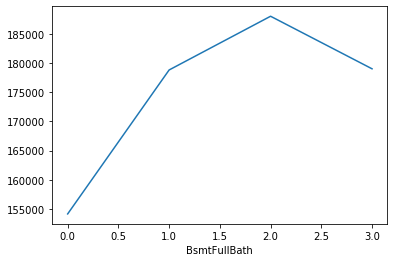

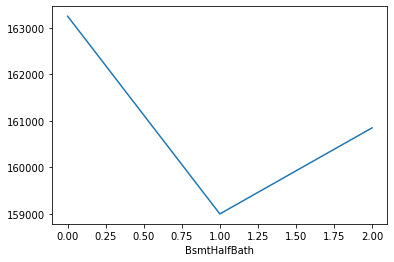

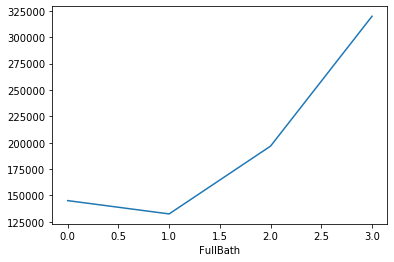

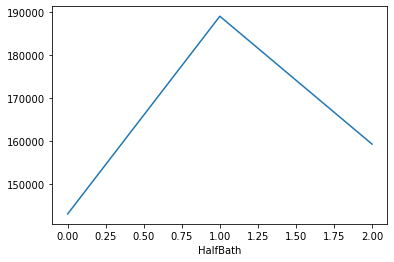

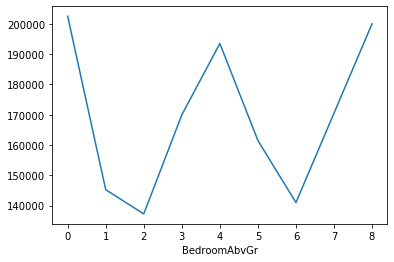

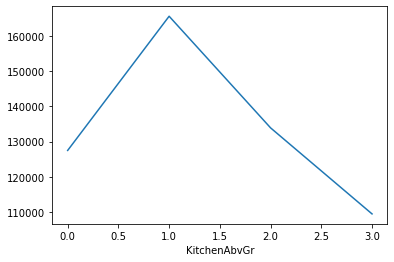

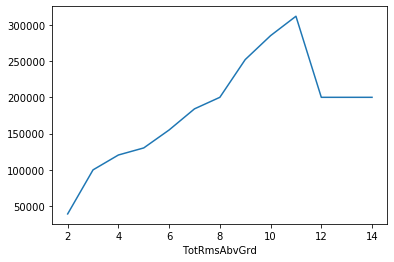

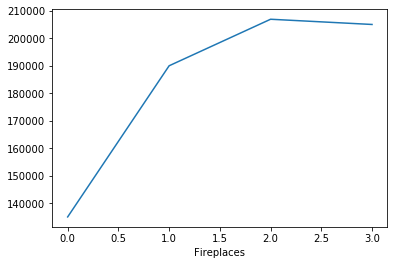

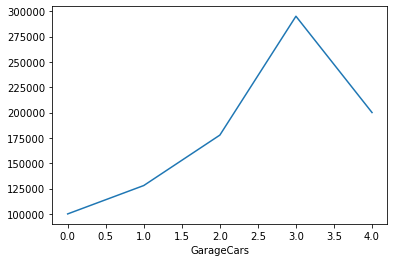

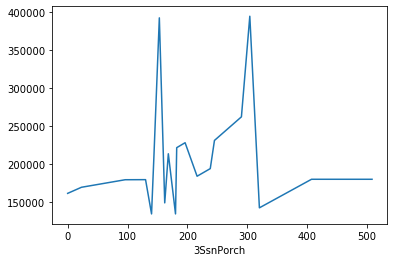

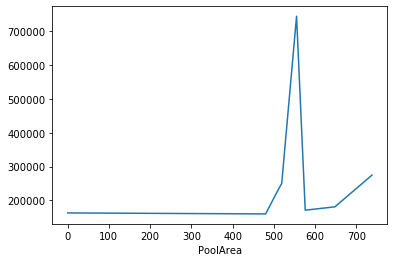

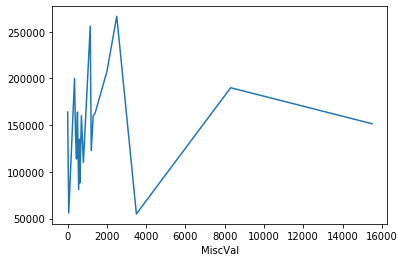

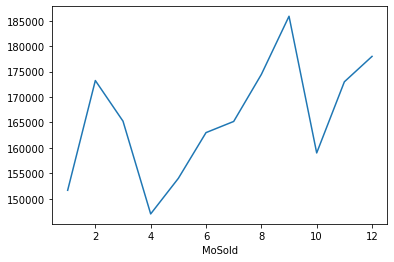

In [15]:
for cols in discrete_cols:
    df.groupby(cols)["SalePrice"].median().plot()
    plt.show()
    
    

In [16]:
df[discrete_cols].head(10)

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
5,50,5,5,0,1,0,1,1,1,1,5,0,2,320,0,700,10
6,20,8,5,0,1,0,2,0,3,1,7,1,2,0,0,0,8
7,60,7,6,0,1,0,2,1,3,1,7,2,2,0,0,350,11
8,50,7,5,0,0,0,2,0,2,2,8,2,2,0,0,0,4
9,190,5,6,0,1,0,1,0,2,2,5,2,1,0,0,0,1


### CONTINOUS VARIABLE ANALYSIS

In [17]:
continous_cols = [cols for cols in numerical_cols if cols not in discrete_cols + ["Id"] + year_cols]

In [18]:
# The total number of continuos columns are 
len(continous_cols)

16

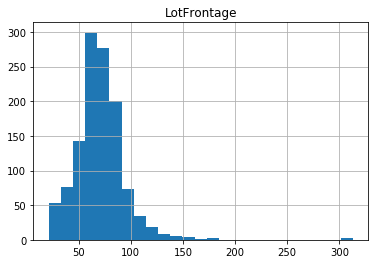

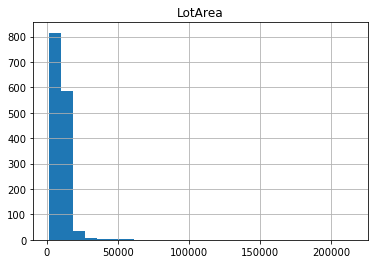

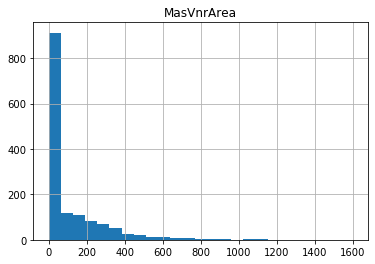

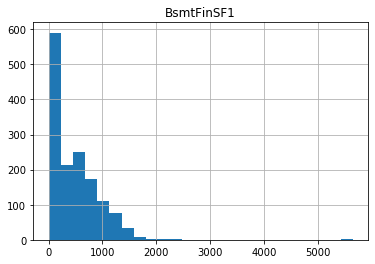

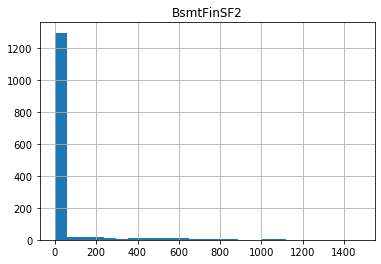

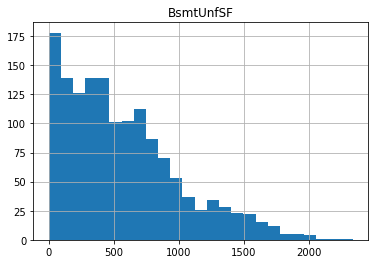

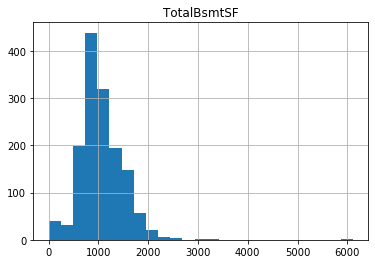

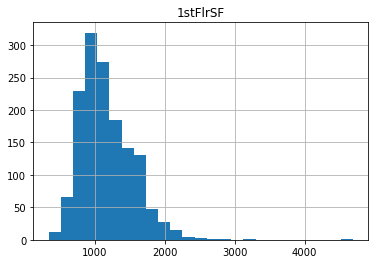

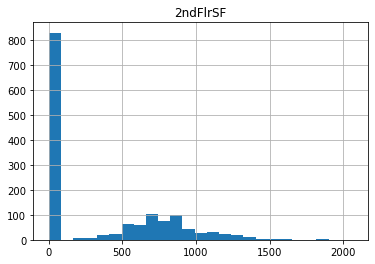

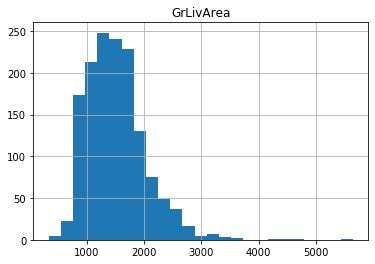

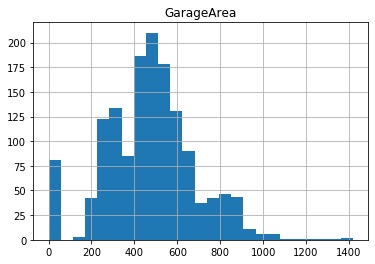

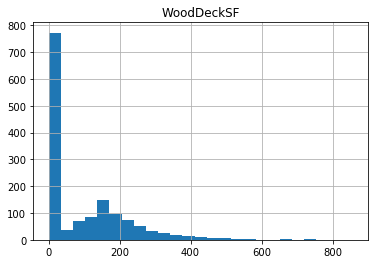

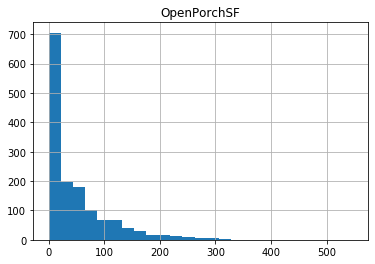

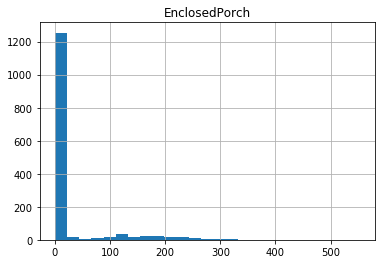

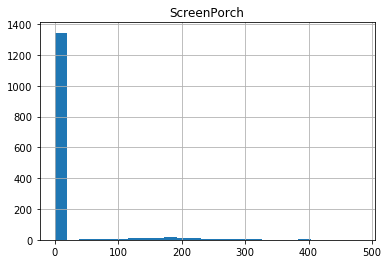

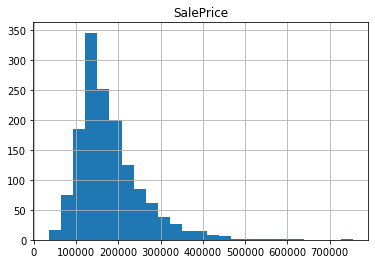

In [22]:
for cols in continous_cols:
    df[cols].hist(bins=25)
    plt.title(cols)
    plt.show()

#### LOG NORMAL USED TO VISUALISE THE CONTINOUS RANDOM VARIABLE


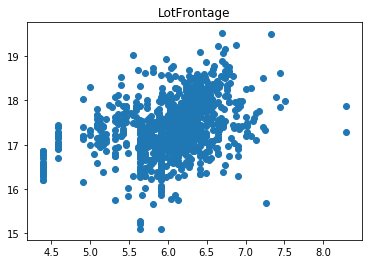

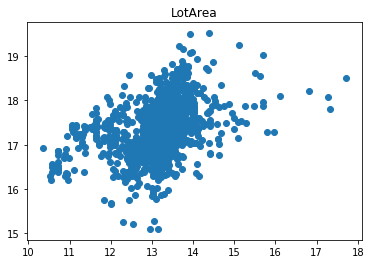

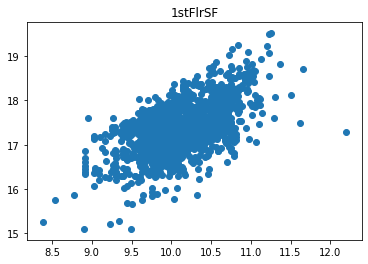

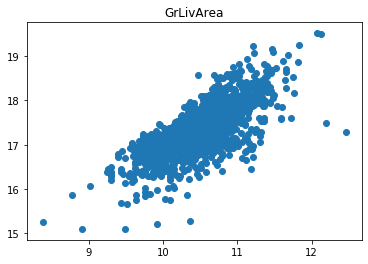

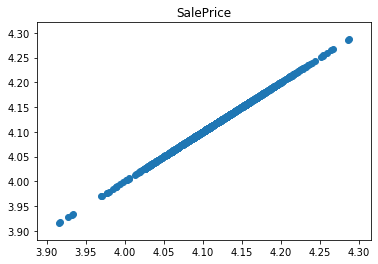

In [79]:
df_copy = df.copy()
df_copy["SalePrice"] = np.log2(df_copy["SalePrice"])
for cols in continous_cols:
    if 0 in df_copy[cols].unique():
        pass
    else:
        df_copy[cols] = np.log2(df_copy[cols])
        plt.scatter(df_copy[cols] , df_copy["SalePrice"])
        plt.title(cols)
        plt.show()

## STEP-4 & 5

#### CATEGORICAL FEATURES

In [59]:
categorical_cols = [cols for cols in df.columns if cols not in numerical_cols]

In [61]:
df[categorical_cols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [71]:
len(categorical_cols)

43

In [73]:
for cols in categorical_cols:
    print(f"{cols}  -----  {len(df[cols].unique())}")

MSZoning  -----  5
Street  -----  2
Alley  -----  3
LotShape  -----  4
LandContour  -----  4
Utilities  -----  2
LotConfig  -----  5
LandSlope  -----  3
Neighborhood  -----  25
Condition1  -----  9
Condition2  -----  8
BldgType  -----  5
HouseStyle  -----  8
RoofStyle  -----  6
RoofMatl  -----  8
Exterior1st  -----  15
Exterior2nd  -----  16
MasVnrType  -----  5
ExterQual  -----  4
ExterCond  -----  5
Foundation  -----  6
BsmtQual  -----  5
BsmtCond  -----  5
BsmtExposure  -----  5
BsmtFinType1  -----  7
BsmtFinType2  -----  7
Heating  -----  6
HeatingQC  -----  5
CentralAir  -----  2
Electrical  -----  6
KitchenQual  -----  4
Functional  -----  7
FireplaceQu  -----  6
GarageType  -----  7
GarageFinish  -----  4
GarageQual  -----  6
GarageCond  -----  6
PavedDrive  -----  3
PoolQC  -----  4
Fence  -----  5
MiscFeature  -----  5
SaleType  -----  9
SaleCondition  -----  6


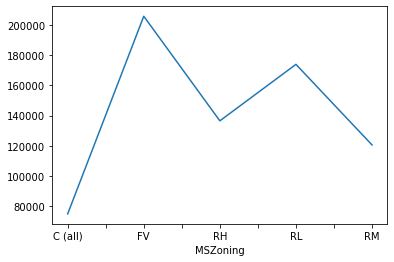

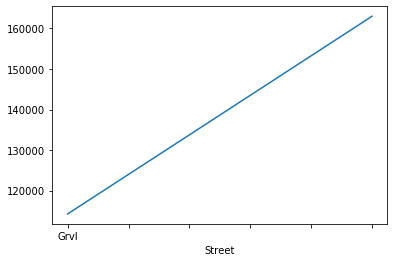

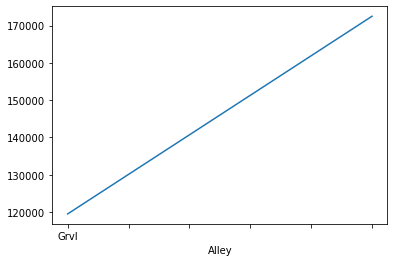

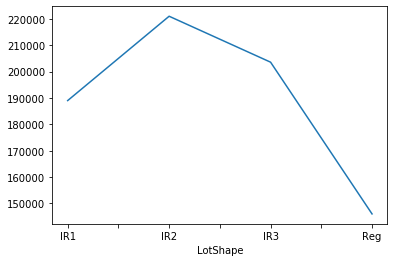

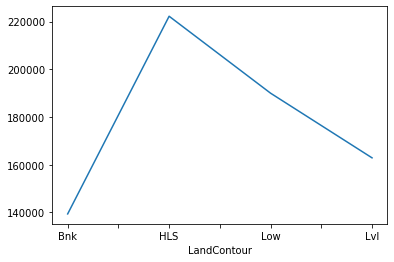

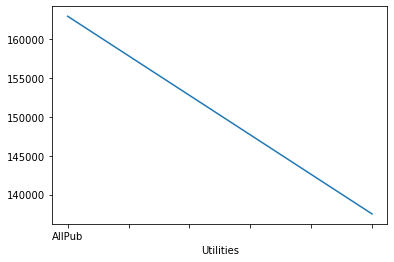

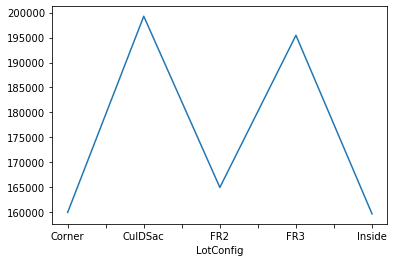

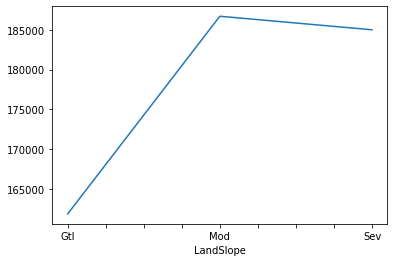

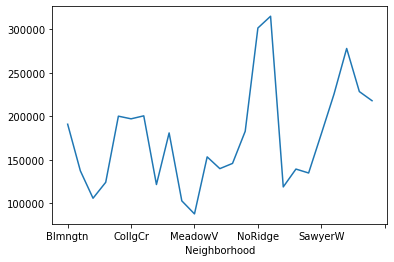

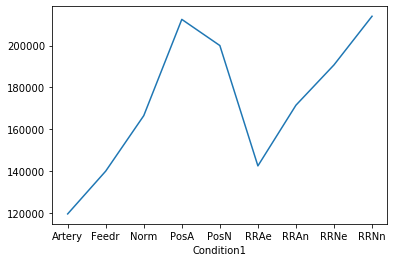

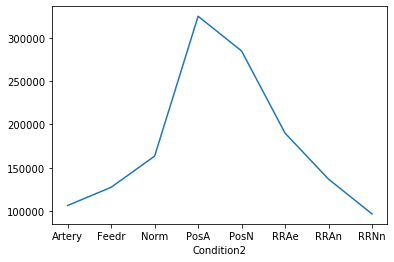

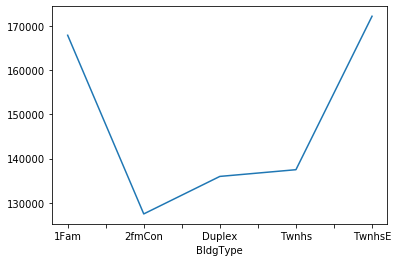

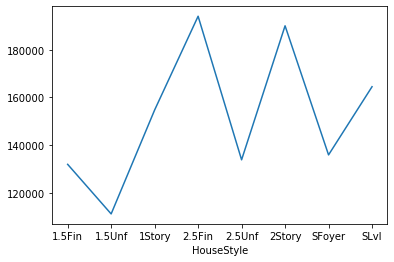

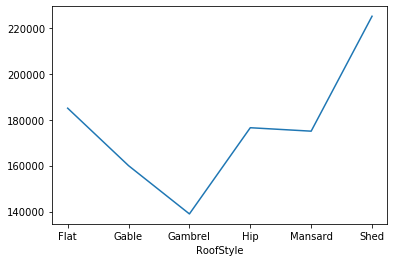

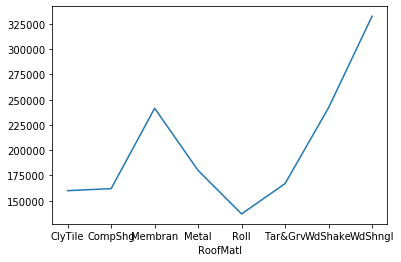

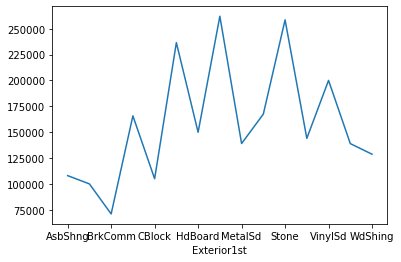

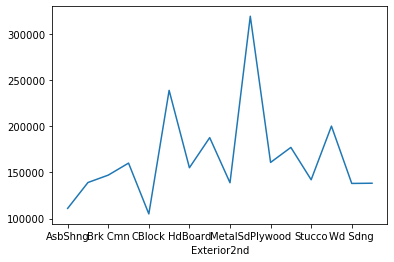

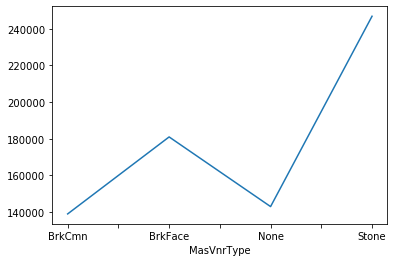

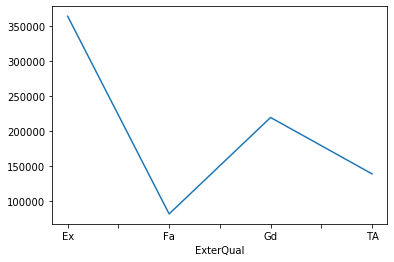

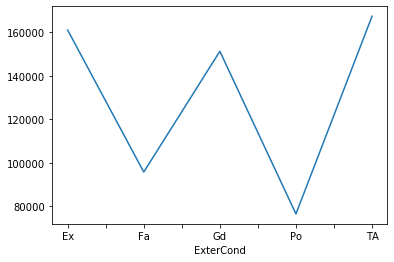

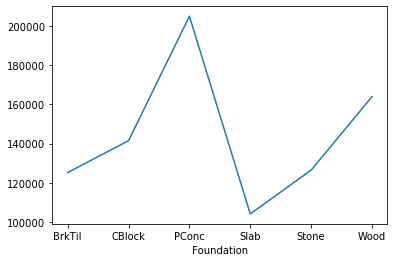

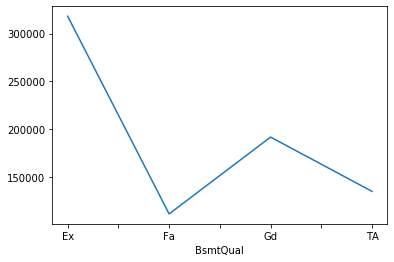

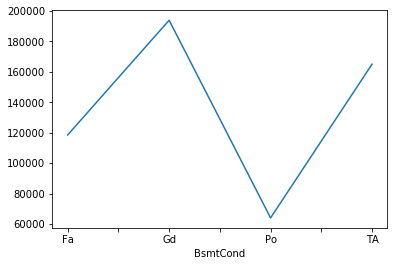

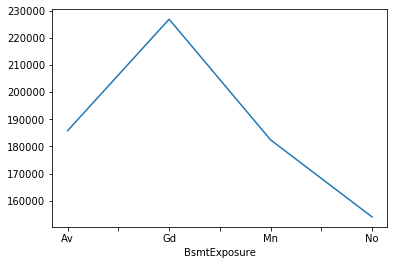

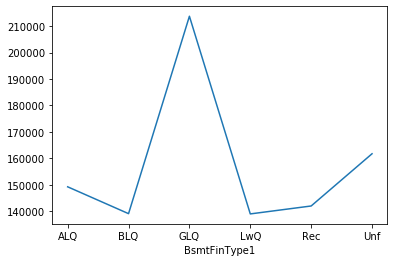

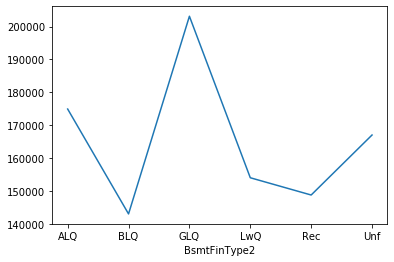

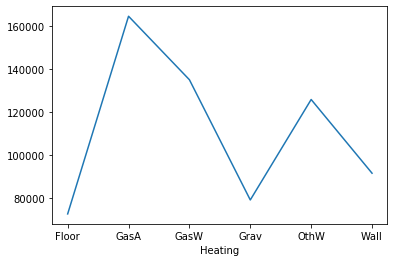

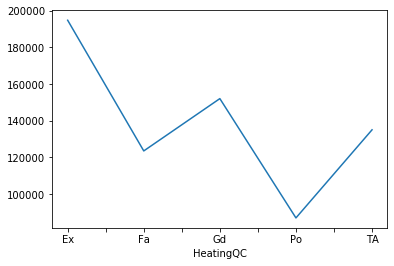

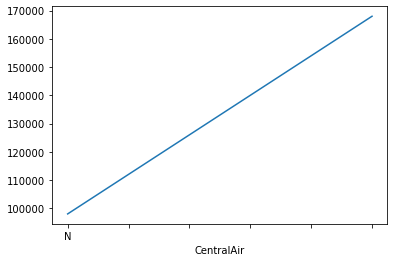

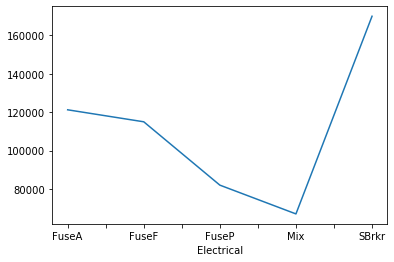

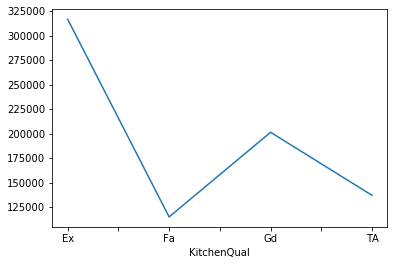

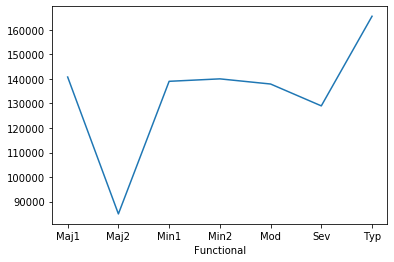

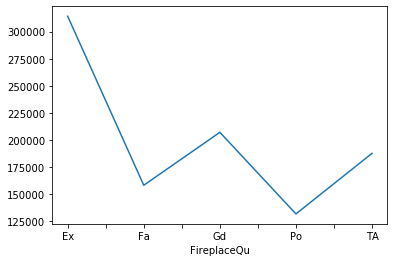

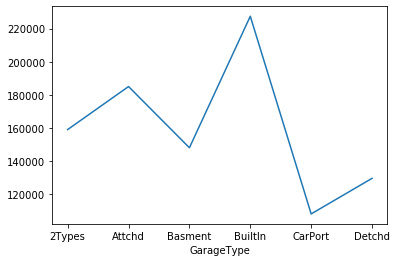

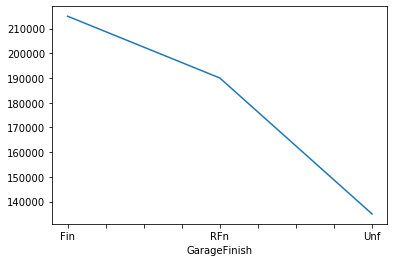

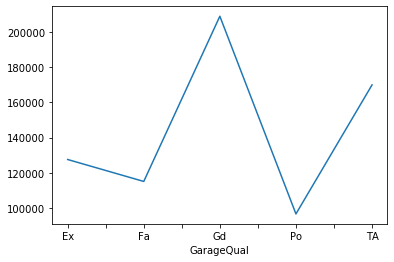

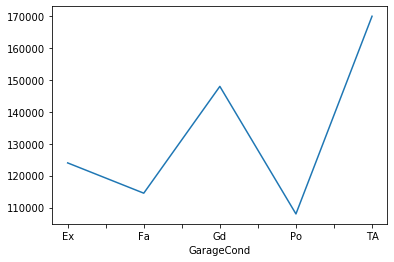

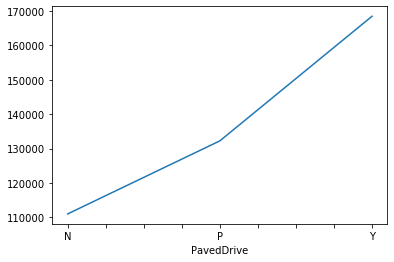

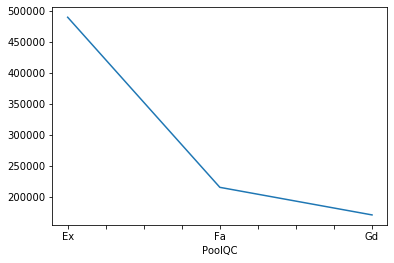

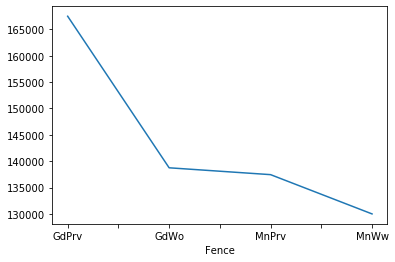

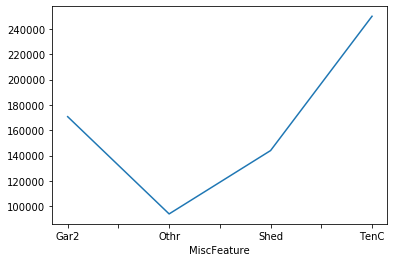

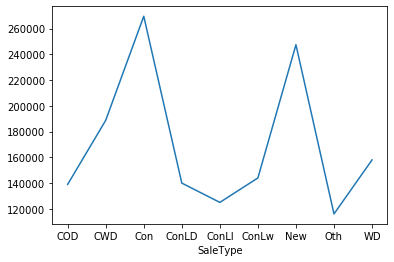

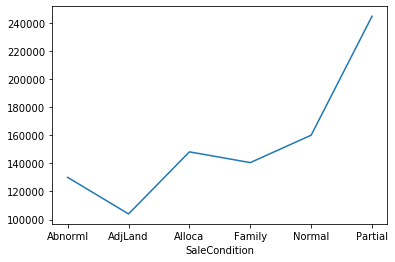

In [77]:
for cols in categorical_cols:
    
    df.groupby(cols)["SalePrice"].median().plot()
    plt.show()

## STEP-6

#### OUTLIERS
USING BOXPLOT TO FIND THE OUTLIERS

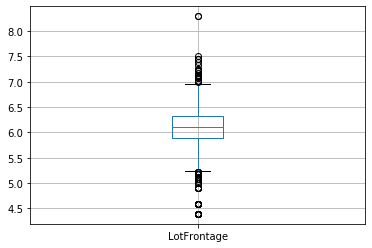

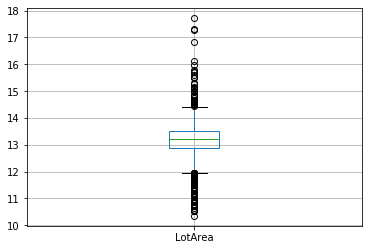

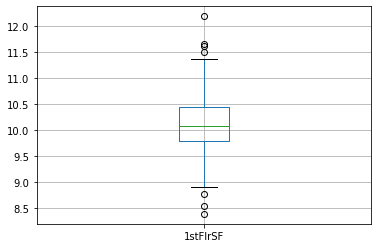

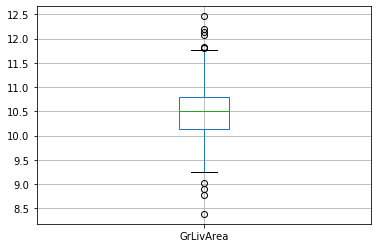

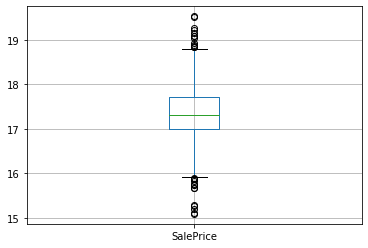

In [78]:
df_copy = df.copy()
for cols in continous_cols:
    if 0 in df_copy[cols].unique():
        pass
    else:
        df_copy[cols] = np.log2(df_copy[cols])
        df_copy.boxplot(cols)
        plt.show()